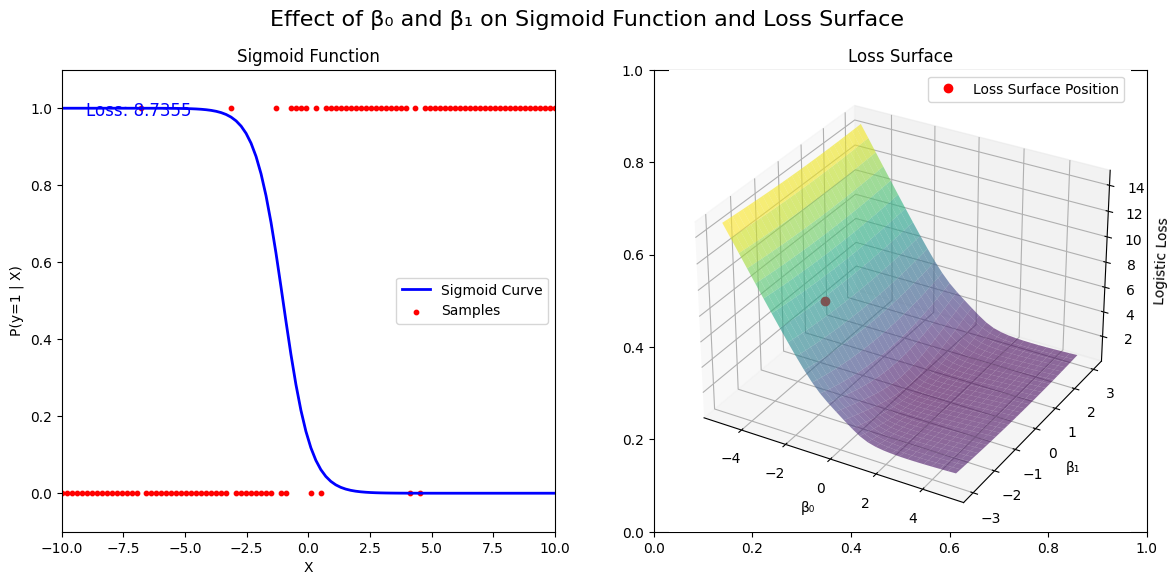

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.special import expit 
np.random.seed(0)
X = np.linspace(-10, 10, 100)
prob_y = expit(0.5 * X)  
y = (np.random.rand(len(X)) < prob_y).astype(int) 
def sigmoid(x, beta0, beta1):
    return expit(beta0 + beta1 * x)

def logistic_loss(beta0, beta1):
    predictions = sigmoid(X, beta0, beta1)
    epsilon = 1e-15  
    return -np.mean(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Effect of β₀ and β₁ on Sigmoid Function and Loss Surface', fontsize=16)

line, = ax1.plot(X, sigmoid(X, 0, 1), 'b-', lw=2, label="Sigmoid Curve")
samples = ax1.scatter(X, y, color="red", label="Samples", s=10)
ax1.legend()
ax1.set_title('Sigmoid Function')
ax1.set_xlim(X.min(), X.max())
ax1.set_ylim(-0.1, 1.1)
ax1.set_xlabel('X')
ax1.set_ylabel('P(y=1 | X)')

loss_text = ax1.text(0.05, 0.9, '', transform=ax1.transAxes, fontsize=12, color='blue')

beta0_vals = np.linspace(-5, 5, 30)
beta1_vals = np.linspace(-3, 3, 30)
B0, B1 = np.meshgrid(beta0_vals, beta1_vals)
Loss = np.array([[logistic_loss(b0, b1) for b1 in beta1_vals] for b0 in beta0_vals])

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(B0, B1, Loss, cmap='viridis', alpha=0.6)
point, = ax2.plot([], [], [], 'ro', markersize=6, label="Loss Surface Position")
ax2.set_title('Loss Surface')
ax2.set_xlabel('β₀')
ax2.set_ylabel('β₁')
ax2.set_zlabel('Logistic Loss')
ax2.set_zlim(Loss.min(), Loss.max())
ax2.legend()

def animate(i):
    beta0 = 4 * np.sin(i / 10)
    beta1 = 2 * np.cos(i / 10)
    
    line.set_ydata(sigmoid(X, beta0, beta1))
    
    loss_val = logistic_loss(beta0, beta1)
    loss_text.set_text(f'Loss: {loss_val:.4f}')
    
    point.set_data([beta0], [beta1])
    point.set_3d_properties([loss_val])

ani = FuncAnimation(fig, animate, frames=100, interval=250)
ani.save("logistic_regression.mp4", writer="ffmpeg", fps=10)
plt.show()
